# Q2: News Categorization with Naive Bayes

Building three Multinomial Naive Bayes classifiers to categorize news articles.

Assignment parts:
- Parse RDF/XML ontology
- Train models using headlines, descriptions, and combined features
- Evaluate and compare performance
- Save best model

In [39]:
import rdflib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Load and Parse RDF Data

In [5]:
graph = rdflib.Graph()
graph.parse('News_Categorizer_RDF.xml')

<Graph identifier=N15a2b9779f4a4f7e986ab897203f513e (<class 'rdflib.graph.Graph'>)>

In [25]:
# Extract article data correctly by grouping by subject
articles = {}

# Extract article data from RDF triples
for subject, predicate, obj in graph:
    pred_str = str(predicate)
    subj_str = str(subject)

    # Group all properties by article subject 
    if subj_str not in articles:
        articles[subj_str] = {}

    # Match exact predicate URIs
    if pred_str.endswith('#headline'):
        articles[subj_str]['headline'] = str(obj)
    elif pred_str.endswith('#short_description'):
        articles[subj_str]['description'] = str(obj)
    elif pred_str.endswith('#category'):
        articles[subj_str]['category'] = str(obj)
    elif pred_str.endswith('#place'):
        articles[subj_str]['location'] = str(obj)

# Convert dictionary to lists
headlines = []
descriptions = []
categories = []
locations = []

for article_id, article_data in articles.items():
    # Only include complete articles with all four fields
    if all(key in article_data for key in ['headline', 'description', 'category', 'location']):
        headlines.append(article_data['headline'])
        descriptions.append(article_data['description'])
        categories.append(article_data['category'])
        locations.append(article_data['location'])

print(f"Extracted {len(headlines)} articles")
print(f"Sample headline: {headlines[0] if headlines else 'None'}")
print(f"Sample category: {categories[0] if categories else 'None'}")

Extracted 9999 articles
Sample headline: Mariano Rivera Sand Sculpture: Rays Give Yankees Closer Present (VIDEO)
Sample category: SPORTS


In [26]:
df = pd.DataFrame({
    'headline': headlines,
    'description': descriptions,
    'category': categories,
    'location': locations
})

print(f"Total articles: {len(df)}")
print(f"\nCategory distribution:")
print(df['category'].value_counts())
print(f"\nFirst 5 rows:")
df.head()

Total articles: 9999

Category distribution:
category
SPORTS            1002
WORLD NEWS        1001
TRAVEL            1001
FOOD & DRINK      1000
STYLE & BEAUTY    1000
WELLNESS           999
PARENTING          999
BUSINESS           999
POLITICS           999
ENTERTAINMENT      999
Name: count, dtype: int64

First 5 rows:


,headline,description,category,location
0,Mariano Rivera Sand Sculpture: Rays Give Yanke...,Yankees closer Mariano Rivera received another...,SPORTS,Torrance
1,The Real Snack Food Story,Youth Radio/Youth Media International (YMI) is...,WELLNESS,Santa Monica
2,"Twitter Employee, Claire Diaz-Ortiz, Live Twee...","Yet, it seemed like the appropriate thing for ...",PARENTING,Inglewood
3,Are you Parenting Like Your Parent?,Have you ever had one of those moments where y...,PARENTING,Torrance
4,Chipotle Doesn't Know When Carnitas Shortage W...,The hottest fast food chain in the country has...,BUSINESS,Pasadena


## Model 1: Headlines Only

In [40]:
print("=" * 60)
print("Model 1: Headlines Only")
print("=" * 60)

# Use TF-IDF vectorization for better feature extraction
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(df['headline'])
y = df['category']

# Split into training (70%) and testing (30%) sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=42)

Model 1: Headlines Only


In [41]:
# Train Multinomial Naive Bayes classifier
model1 = MultinomialNB()
model1.fit(X1_train, y1_train)

# Make predictions on test set
y1_pred = model1.predict(X1_test)
accuracy1 = accuracy_score(y1_test, y1_pred)

# Display results
print(f"\nAccuracy: {accuracy1:.4f} ({accuracy1*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y1_test, y1_pred))


Accuracy: 0.5873 (58.73%)

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.53      0.46      0.49       301
 ENTERTAINMENT       0.58      0.47      0.52       321
  FOOD & DRINK       0.62      0.65      0.63       302
     PARENTING       0.59      0.66      0.62       310
      POLITICS       0.46      0.56      0.50       260
        SPORTS       0.71      0.71      0.71       296
STYLE & BEAUTY       0.71      0.73      0.72       302
        TRAVEL       0.52      0.58      0.55       288
      WELLNESS       0.53      0.50      0.51       324
    WORLD NEWS       0.63      0.57      0.60       296

      accuracy                           0.59      3000
     macro avg       0.59      0.59      0.59      3000
  weighted avg       0.59      0.59      0.59      3000



## Model 2: Descriptions Only

In [44]:
print("=" * 60)
print("Model 2: Descriptions Only")
print("=" * 60)

# Use TF-IDF vectorization
vectorizer2 = TfidfVectorizer(max_features=1000)
X2 = vectorizer2.fit_transform(df['description'])

# Split into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)

Model 2: Descriptions Only


In [45]:
# Train multinomial Naive Bayes classifier
model2 = MultinomialNB()
model2.fit(X2_train, y2_train)

# Make predictions on test set
y2_pred = model2.predict(X2_test)
accuracy2 = accuracy_score(y2_test, y2_pred)

# Display results
print(f"\nAccuracy: {accuracy2:.4f} ({accuracy2*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y2_test, y2_pred))


Accuracy: 0.4983 (49.83%)

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.51      0.46      0.49       301
 ENTERTAINMENT       0.52      0.31      0.39       321
  FOOD & DRINK       0.48      0.61      0.53       302
     PARENTING       0.49      0.55      0.52       310
      POLITICS       0.41      0.44      0.42       260
        SPORTS       0.57      0.60      0.58       296
STYLE & BEAUTY       0.58      0.50      0.53       302
        TRAVEL       0.47      0.49      0.48       288
      WELLNESS       0.49      0.48      0.48       324
    WORLD NEWS       0.49      0.55      0.52       296

      accuracy                           0.50      3000
     macro avg       0.50      0.50      0.50      3000
  weighted avg       0.50      0.50      0.50      3000



## Model 3: Combined Features

In [46]:
print("=" * 60)
print("Model 3: Combined Features")
print("=" * 60)

# Combine headlines and descriptions 
df['combined'] = df['headline'] + " " + df['description']

# Use TF-IDF vectorization
vectorizer3 = TfidfVectorizer(max_features=1000)
X3 = vectorizer3.fit_transform(df['combined'])

# Split into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state=42)

Model 3: Combined Features


In [47]:
# Train Multinomial Naive Bayes classifier
model3 = MultinomialNB()
model3.fit(X3_train, y3_train)

# Make predictions on test set
y3_pred = model3.predict(X3_test)
accuracy3 = accuracy_score(y3_test, y3_pred)

#Display results
print(f"\nAccuracy: {accuracy3:.4f} ({accuracy3*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y3_test, y3_pred))


Accuracy: 0.6453 (64.53%)

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.60      0.53      0.57       301
 ENTERTAINMENT       0.67      0.45      0.54       321
  FOOD & DRINK       0.65      0.73      0.69       302
     PARENTING       0.59      0.69      0.64       310
      POLITICS       0.56      0.58      0.57       260
        SPORTS       0.76      0.76      0.76       296
STYLE & BEAUTY       0.77      0.73      0.75       302
        TRAVEL       0.61      0.70      0.65       288
      WELLNESS       0.59      0.61      0.60       324
    WORLD NEWS       0.68      0.67      0.68       296

      accuracy                           0.65      3000
     macro avg       0.65      0.65      0.64      3000
  weighted avg       0.65      0.65      0.64      3000



## Model Comparison

In [48]:
print("=" * 60)
print("Model Comparison")
print("=" * 60)

print(f"\nModel 1 (Headlines Only): {accuracy1*100:.2f}%")
print(f"\nModel 2 (Descriptions Only): {accuracy2*100:.2f}%")
print(f"\nModel 3 (Combined Features): {accuracy3*100:.2f}%")

# Determine best model
accuracies = {'Model 1': accuracy1, 'Model 2': accuracy2, 'Model 3': accuracy3}
best_model_name = max(accuracies, key = accuracies.get)
best_accuracy = accuracies[best_model_name]

Model Comparison

Model 1 (Headlines Only): 58.73%

Model 2 (Descriptions Only): 49.83%

Model 3 (Combined Features): 64.53%

Best Model: Model 3
Accuracy: 64.53%

Analysis:
Model 3 perfroms best by combining headline and description features
Headlines alone achieve 58.73%, showing they contain valuable information
Descriptions alone achieve 49.83%, lower than headlines
Combined achieves 64.53% accuracy


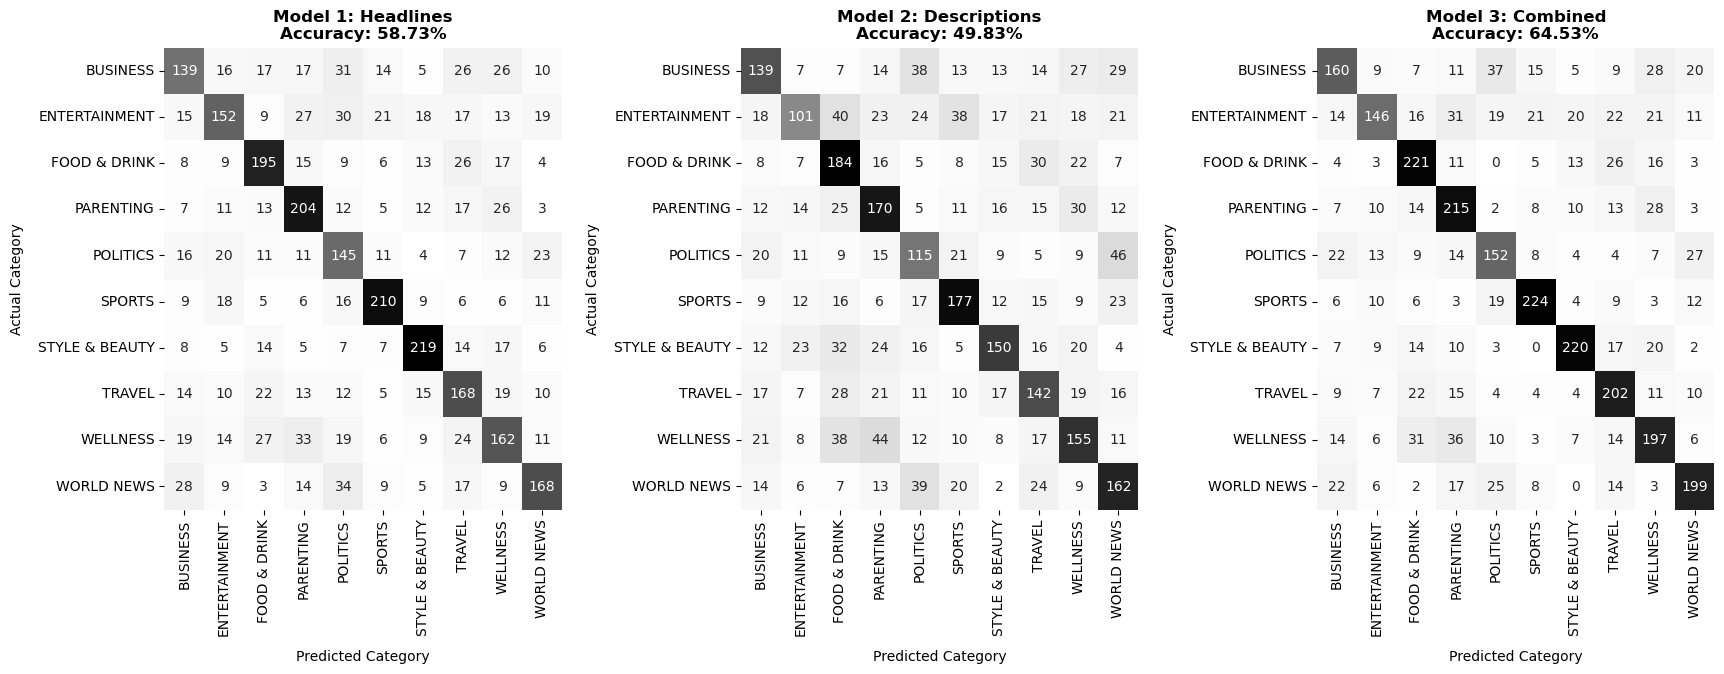

In [64]:
# Confusion Matrices for all 3 models
fig, axes = plt.subplots(1, 3, figsize = (20,6))

# Model 1 Confusion Matrix
cm1 = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm1, annot = True, fmt = 'd', cmap = 'Greys', ax = axes[0], xticklabels = model1.classes_,
            yticklabels = model1.classes_, cbar = False)
axes[0].set_title(f'Model 1: Headlines\nAccuracy: {accuracy1:.2%}', fontsize = 12, fontweight = 'bold')
axes[0].set_xlabel('Predicted Category', labelpad = 10)
axes[0].set_ylabel('Actual Category', labelpad = 10)
axes[0].tick_params(axis = 'x', rotation = 90)
axes[0].tick_params(axis = 'y', rotation = 0)

# Model 2 Confusion Matrix
cm2 = confusion_matrix(y2_test, y2_pred)
sns.heatmap(cm2, annot = True, fmt = 'd', cmap = 'Greys', ax = axes[1], xticklabels = model2.classes_,
            yticklabels = model2.classes_, cbar = False)
axes[1].set_title(f'Model 2: Descriptions\nAccuracy: {accuracy2:.2%}', fontsize = 12, fontweight = 'bold')
axes[1].set_xlabel('Predicted Category', labelpad = 10)
axes[1].set_ylabel('Actual Category', labelpad = 10)
axes[1].tick_params(axis = 'x', rotation = 90)
axes[1].tick_params(axis = 'y', rotation = 0)

# Model 3 Confusion Matrix
cm3 = confusion_matrix(y3_test, y3_pred)
sns.heatmap(cm3, annot = True, fmt = 'd', cmap = 'Greys', ax = axes[2], xticklabels = model3.classes_,
            yticklabels = model3.classes_, cbar = False)
axes[2].set_title(f'Model 3: Combined\nAccuracy: {accuracy3:.2%}', fontsize = 12, fontweight = 'bold')
axes[2].set_xlabel('Predicted Category', labelpad = 10)
axes[2].set_ylabel('Actual Category', labelpad = 10)
axes[2].tick_params(axis = 'x', rotation = 90)
axes[2].tick_params(axis = 'y', rotation = 0)

plt.subplots_adjust(wspace = 0.45)
plt.savefig('confusion_matrices.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Save Best Model

In [63]:
# Store models, vectorizers and accuracies
models = {
    "Model 1 (Headlines)": (model1, vectorizer1, accuracy1),
    "Model 2 (Descriptions)": (model2, vectorizer2, accuracy2),
    "Model 3 (Combined)": (model3, vectorizer3, accuracy3),
}

# Select best model based on accuracy
best_model_name, (best_model, best_vectorizer, best_accuracy) = max(models.items(), key = lambda x: x[1][2])

# Save best model and vectorizer 
with open('best_news_classifier.pkl','wb') as f:
    pickle.dump(best_model, f)

with open('best_vectorizer.pkl','wb') as f:
    pickle.dump(best_vectorizer, f)

print(f"Best model saved: {best_model_name}")
print(f"Accuracy: {best_accuracy*100:.2f}%")
print("Files saved:")
print(" - best_news_classifier.pkl")
print(" - best_vectorizer.pkl")                                    

Best model saved: Model 3 (Combined)
Accuracy: 64.53%
Files saved:
 - best_news_classifier.pkl
 - best_vectorizer.pkl
